In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [2]:
#read data
AGEs=pd.read_csv('AGEs.csv')
earLobe=pd.read_csv('earLobe.csv')
innerArm=pd.read_csv('innerArm.csv')
thumbNail=pd.read_csv('thumbNail.csv')
vein=pd.read_csv('vein.csv')

In [3]:
innerArm

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0
5,DM205,1.0,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,...,0,0,0,0,0,0,0,0,0,0
6,DM206,1.0,237.400000,237.400000,237.400000,237.400000,237.400000,237.400000,237.400000,237.400000,...,0,0,0,0,0,0,0,0,0,0
7,DM207,1.0,217.333333,217.333333,217.333333,217.333333,217.333333,217.333333,217.333333,217.333333,...,0,0,0,0,0,0,0,0,0,0
8,DM208,1.0,89.166667,89.166667,89.166667,89.166667,89.166667,89.166667,89.166667,89.166667,...,0,0,0,0,0,0,0,0,0,0
9,DM209,1.0,336.600000,336.600000,336.600000,336.600000,336.600000,336.600000,336.600000,336.600000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#function to drop columns with wrong values
def drop_columns_from(df, column_name):
    col_index = df.columns.get_loc(column_name)
    return df.iloc[:, :col_index]

In [5]:
earLobe = drop_columns_from(earLobe, 'Var3003')
innerArm = drop_columns_from(innerArm, 'Var3003')
thumbNail = drop_columns_from(thumbNail, 'Var3003')
vein = drop_columns_from(vein, 'Var3003')

In [6]:
innerArm = innerArm.drop(innerArm.index[0])
earLobe = earLobe.drop(earLobe.index[0])
thumbNail = thumbNail.drop(thumbNail.index[0])
vein = vein.drop(vein.index[0])

In [7]:
print(innerArm.head())
print(earLobe.head())
print(thumbNail.head())
print(vein.head())

  patientID  has_DM2        Var2        Var3        Var4        Var5  \
1     DM201      1.0  326.000000  326.000000  326.000000  326.000000   
2     DM202      1.0  214.800000  214.800000  214.800000  214.800000   
3     DM203      1.0  457.800000  457.800000  457.800000  457.800000   
4     DM204      1.0  181.833333  181.833333  181.833333  181.833333   
5     DM205      1.0  179.800000  179.800000  179.800000  179.800000   

         Var6        Var7        Var8        Var9  ...    Var2993   Var2994  \
1  326.000000  326.000000  326.000000  326.000000  ...  15.500000  5.025883   
2  214.800000  214.800000  214.800000  214.800000  ...  11.727010  7.810353   
3  457.800000  457.800000  457.800000  457.800000  ...  20.733215  5.637962   
4  181.833333  181.833333  181.833333  181.833333  ...  10.599453  1.023829   
5  179.800000  179.800000  179.800000  179.800000  ...   2.606204  6.590140   

     Var2995    Var2996    Var2997   Var2998    Var2999    Var3000    Var3001  \
1  20.59122

In [8]:
innerArm.shape

(20, 3003)

In [9]:
print(innerArm.isna().sum())
print(earLobe.isna().sum())
print(thumbNail.isna().sum())
print(vein.isna().sum())

patientID    0
has_DM2      0
Var2         0
Var3         0
Var4         0
            ..
Var2998      0
Var2999      0
Var3000      0
Var3001      0
Var3002      0
Length: 3003, dtype: int64
patientID    0
has_DM2      0
Var2         0
Var3         0
Var4         0
            ..
Var2998      0
Var2999      0
Var3000      0
Var3001      0
Var3002      0
Length: 3003, dtype: int64
patientID    0
has_DM2      0
Var2         0
Var3         0
Var4         0
            ..
Var2998      0
Var2999      0
Var3000      0
Var3001      0
Var3002      0
Length: 3003, dtype: int64
patientID    0
has_DM2      0
Var2         0
Var3         0
Var4         0
            ..
Var2998      0
Var2999      0
Var3000      0
Var3001      0
Var3002      0
Length: 3003, dtype: int64


##innerArm

In [10]:
X_innerArm=innerArm.iloc[:,2:]
y_innerArm=innerArm.iloc[:,1]

<Axes: >

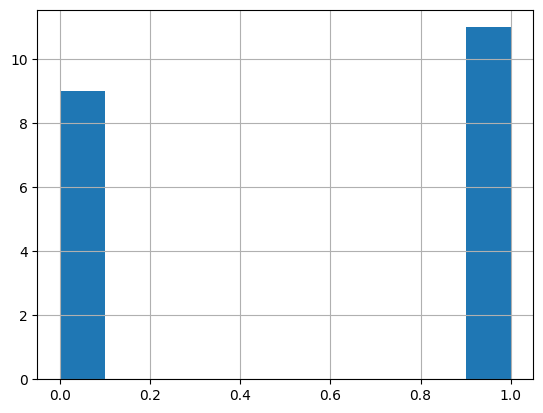

In [ ]:
innerArm['has_DM2'].hist()

In [ ]:
X_innerArm.shape

(20, 3001)

In [ ]:
from sklearn.utils import shuffle
# 1. SMOTE for Synthetic Minority Over-sampling
smote = SMOTE(sampling_strategy='auto', k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_innerArm, y_innerArm)

# 2. Noise Injection for Data Augmentation
def add_noise(data, noise_level=0.1):
    noise = noise_level * np.random.randn(*data.shape)
    data_noisy = data + noise
    return data_noisy

# Applying noise to resampled data
X_noisy = add_noise(X_resampled, noise_level=0.1)

# 3. Combining Original, SMOTE, and Noisy Data
X_augmented = pd.concat([X_resampled, X_noisy], axis=0)
y_augmented = pd.concat([y_resampled, y_resampled], axis=0)

# Shuffle the augmented dataset
X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state=42)


# Display the augmented dataset size
print("Original dataset size:", X_innerArm.shape[0])
print("Resampled dataset size after SMOTE:", X_resampled.shape[0])
print("Final augmented dataset size:", X_augmented.shape[0])

Original dataset size: 20
Resampled dataset size after SMOTE: 22
Final augmented dataset size: 44


<Axes: >

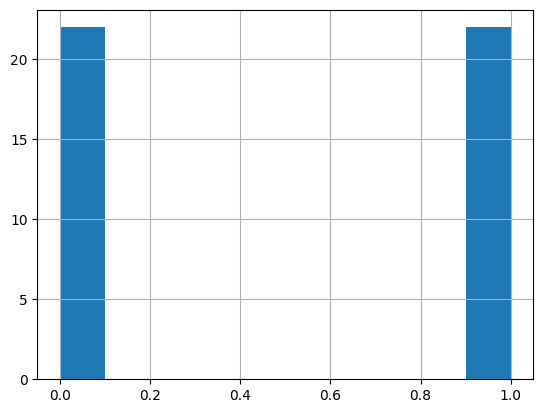

In [ ]:
y_augmented.hist()

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

In [ ]:
#random forest
model1 = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=4)
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=10, random_state=42)

In [ ]:
y_pred = model1.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [ ]:
train_accuracy = accuracy_score(y_train, model1.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 1.0000


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4 0]
 [0 5]]


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model1, X_train, y_train, cv=3)
print("Cross-Validation Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")

Cross-Validation Scores: [0.75       0.66666667 0.90909091]
Mean Cross-Validation Score: 0.7753


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',
                           n_jobs=-1,  # Use all available cores
                           verbose=2)  # Print progress messages

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred = grid_search.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion Matrix:
[[4 0]
 [0 5]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest model with the best parameters
best_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42  # Ensure reproducibility
)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_augmented, y_augmented, cv=5, scoring='accuracy')

# Print cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [1.         0.88888889 1.         1.         1.        ]
Mean Cross-Validation Score: 0.9777777777777779
Standard Deviation of Cross-Validation Scores: 0.04444444444444447


##earLobe

In [ ]:
earLobe

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var2993,Var2994,Var2995,Var2996,Var2997,Var2998,Var2999,Var3000,Var3001,Var3002
1,DM201,1.0,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,...,1.000000,12.970419,-0.162721,1.784965,10.615159,0.715051,4.629650,5.303910,7.133134,4.077098
2,DM202,1.0,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,...,13.139419,8.212818,26.863908,29.267496,28.620376,10.057526,13.393549,23.811571,30.004013,9.211222
3,DM203,1.0,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,...,16.421537,-0.158094,17.882836,13.442509,10.005216,2.536457,10.222650,14.087949,13.023228,3.171077
4,DM204,1.0,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,...,8.374695,1.018077,18.895465,21.119795,19.181473,7.916948,14.858042,15.419926,15.847851,7.801855
5,DM205,1.0,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,...,1.857301,3.995070,1.688162,-2.062520,3.669112,4.657526,5.443651,-1.847885,-4.120922,-1.208029
6,DM206,1.0,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,...,-23.737957,-20.408381,-29.594674,-29.400000,-28.104157,-15.008697,-21.141799,-30.863847,-32.168573,-16.912408
7,DM207,1.0,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,...,10.914602,-14.735909,15.591722,21.778799,8.207335,9.604011,4.697049,11.000000,9.217421,1.963047
8,DM208,1.0,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,...,15.038628,3.362914,15.784033,25.829187,18.539664,2.679491,13.031000,15.936352,21.099771,7.801855
9,DM209,1.0,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,...,19.671171,-2.544290,27.136093,24.563764,19.597881,9.889634,17.726699,24.883878,24.647053,9.211222
10,DM210,1.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,45.617835,40.441952,63.834730,53.238354,61.984983,38.350221,56.016571,62.139949,59.275283,33.112943


In [ ]:
X_earLobe=earLobe.iloc[:,2:]
y_earLobe=earLobe.iloc[:,1]

In [ ]:
from sklearn.utils import shuffle

# 1. SMOTE for Synthetic Minority Over-sampling
smote = SMOTE(sampling_strategy='auto', k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_earLobe, y_earLobe)

# 2. Noise Injection for Data Augmentation
def add_noise(data, noise_level=0.1):
    noise = noise_level * np.random.randn(*data.shape)
    data_noisy = data + noise
    return data_noisy

# Applying noise to resampled data
X_noisy = add_noise(X_resampled, noise_level=0.1)

# 3. Combining Original, SMOTE, and Noisy Data
X_augmented = pd.concat([X_resampled, X_noisy], axis=0)
y_augmented = pd.concat([y_resampled, y_resampled], axis=0)

# Shuffle the augmented dataset
X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state=42)


# Display the augmented dataset size
print("Original dataset size:", X_earLobe.shape[0])
print("Resampled dataset size after SMOTE:", X_resampled.shape[0])
print("Final augmented dataset size:", X_augmented.shape[0])

Original dataset size: 20
Resampled dataset size after SMOTE: 22
Final augmented dataset size: 44


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred = grid_search.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion Matrix:
[[4 0]
 [0 5]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest model with the best parameters
model_earlope = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42  # Ensure reproducibility
)

# Perform cross-validation
cv_scores = cross_val_score(model_earlope, X_augmented, y_augmented, cv=5, scoring='accuracy')

# Print cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [1.         0.77777778 1.         1.         1.        ]
Mean Cross-Validation Score: 0.9555555555555555


#vien

In [25]:
X_vien=vein.iloc[:,2:]
y_vien=vein.iloc[:,1]

In [26]:
X_vien.shape

(20, 3001)

In [27]:
from sklearn.utils import shuffle

# 1. SMOTE for Synthetic Minority Over-sampling
smote = SMOTE(sampling_strategy='auto', k_neighbors=3)
X_resampled_vien, y_resampled_vien = smote.fit_resample(X_vien, y_vien)

# 2. Noise Injection for Data Augmentation
def add_noise(data, noise_level=0.1):
    noise = noise_level * np.random.randn(*data.shape)
    data_noisy = data + noise
    return data_noisy

# Applying noise to resampled data
X_noisy_vien = add_noise(X_resampled_vien, noise_level=0.1)

# 3. Combining Original, SMOTE, and Noisy Data
X_augmented_vien = pd.concat([X_resampled_vien, X_noisy_vien], axis=0)
y_augmented_vien= pd.concat([y_resampled_vien, y_resampled_vien], axis=0)

# Shuffle the augmented dataset
X_augmented_vien, y_augmented_vien = shuffle(X_augmented_vien, y_augmented_vien, random_state=42)


# Display the augmented dataset size
print("Original dataset size:", X_vien.shape[0])
print("Resampled dataset size after SMOTE:", X_resampled_vien.shape[0])
print("Final augmented dataset size:", X_augmented_vien.shape[0])

Original dataset size: 20
Resampled dataset size after SMOTE: 22
Final augmented dataset size: 44


In [28]:
X_train_vien, X_test_vien, y_train_vien, y_test_vien = train_test_split(X_augmented_vien, y_augmented_vien, test_size=0.2, random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train_vien, y_train_vien)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred_vien = grid_search.predict(X_test_vien)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test_vien, y_pred_vien):.4f}")
print("Classification Report:")
print(classification_report(y_test_vien, y_pred_vien))
print("Confusion Matrix:")
print(confusion_matrix(y_test_vien, y_pred_vien))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion Matrix:
[[4 0]
 [0 5]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest model with the best parameters
model_vien = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42  # Ensure reproducibility
)

# Perform cross-validation
cv_scores = cross_val_score(model_vien, X_augmented_vien, y_augmented_vien, cv=5, scoring='accuracy')

# Print cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.77777778 0.77777778 1.         1.         1.        ]
Mean Cross-Validation Score: 0.9111111111111111


#thumbnail

In [33]:
X_thumbnail=thumbNail.iloc[:,2:]
y_thumbnail=thumbNail.iloc[:,1]

In [32]:
X_thumbnail.shape

(20, 3001)

In [34]:
from sklearn.utils import shuffle

# 1. SMOTE for Synthetic Minority Over-sampling
smote = SMOTE(sampling_strategy='auto', k_neighbors=3)
X_resampled_thumbnail, y_resampled_thumbnail = smote.fit_resample(X_thumbnail, y_thumbnail)

# 2. Noise Injection for Data Augmentation
def add_noise(data, noise_level=0.1):
    noise = noise_level * np.random.randn(*data.shape)
    data_noisy = data + noise
    return data_noisy

# Applying noise to resampled data
X_noisy_thumbnail = add_noise(X_resampled_thumbnail, noise_level=0.1)

# 3. Combining Original, SMOTE, and Noisy Data
X_augmented_thumbnail = pd.concat([X_resampled_thumbnail, X_noisy_thumbnail], axis=0)
y_augmented_thumbnail= pd.concat([y_resampled_thumbnail, y_resampled_thumbnail], axis=0)

# Shuffle the augmented dataset
X_augmented_thumbnail, y_augmented_thumbnail = shuffle(X_augmented_thumbnail, y_augmented_thumbnail, random_state=42)


# Display the augmented dataset size
print("Original dataset size:", X_thumbnail.shape[0])
print("Resampled dataset size after SMOTE:", X_resampled_thumbnail.shape[0])
print("Final augmented dataset size:", X_augmented_thumbnail.shape[0])

Original dataset size: 20
Resampled dataset size after SMOTE: 22
Final augmented dataset size: 44


In [35]:
X_train_thumbnail, X_test_thumbnail, y_train_thumbnail, y_test_thumbnail = train_test_split(X_augmented_thumbnail, y_augmented_thumbnail, test_size=0.2, random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train_thumbnail, y_train_thumbnail)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred_thumbnail = grid_search.predict(X_test_thumbnail)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test_thumbnail, y_pred_thumbnail):.4f}")
print("Classification Report:")
print(classification_report(y_test_thumbnail, y_pred_thumbnail))
print("Confusion Matrix:")
print(confusion_matrix(y_test_thumbnail, y_pred_thumbnail))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion Matrix:
[[4 0]
 [0 5]]


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest model with the best parameters
model_thumnail = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=20,
    random_state=42  # Ensure reproducibility
)

# Perform cross-validation
cv_scores = cross_val_score(model_thumnail, X_augmented_thumbnail, y_augmented_thumbnail, cv=5, scoring='accuracy')

# Print cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.77777778 1.         1.         0.77777778 1.        ]
Mean Cross-Validation Score: 0.9111111111111111
